# Import Modules & Data

In [1]:
# For data manipulation 
import pandas as pd
import numpy as np
import math

# For graphical analysis
import seaborn as sns
import matplotlib.pyplot as plt

# For predictive analysis
from sklearn.linear_model import LogisticRegression

In [2]:
# Generate DataFrame
data = pd.read_csv('Stroke.csv')
data 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Preprocessing

### Missing Values

In [3]:
# Original number of rows in DataFrame
len(data)

5110

In [4]:
# Missing values per column
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# Remove 201 missing observations from bmi column
data = data.dropna()
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
# Number of rows in DataFrame after removing missing values
len(data)

4909

In [7]:
smoking_status_unknown = data[(data.smoking_status=='Unknown')]
len(smoking_status_unknown)

1483

Removing 1483 values would be too signifcant and potentially skew our results. Therefore, we will opt to include the values in which smoking status is unknown in our analysis. 

### Dummy Variables

In [8]:
dummy_smoking_status = pd.get_dummies(data.smoking_status)
dummy_ever_married = pd.get_dummies(data.ever_married)
dummy_work_type = pd.get_dummies(data.work_type)
dummy_Residence_type = pd.get_dummies(data.Residence_type)
dummy_gender = pd.get_dummies(data.gender)

data = data.join(dummy_smoking_status)
data = data.join(dummy_ever_married)
data = data.join(dummy_work_type)
data = data.join(dummy_Residence_type)
data = data.join(dummy_gender)

### Correlation Matricies

In [9]:
def CorrMatrix(*arg):
    new_data = data[[*arg]]
    corrMatrix = new_data.corr()
    return pd.DataFrame(corrMatrix)

In [10]:
# Demographic
CorrMatrix('age','Male','Female','stroke')

,age,Male,Female,stroke
age,1.000000,-0.030149,0.030457,0.232331
Male,-0.030149,1.000000,-0.999579,0.006939
Female,0.030457,-0.999579,1.000000,-0.006851
stroke,0.232331,0.006939,-0.006851,1.000000


In [11]:
# Medical Factors
CorrMatrix('hypertension','heart_disease','avg_glucose_level','bmi','smokes','formerly smoked','never smoked','stroke')

,hypertension,heart_disease,avg_glucose_level,bmi,smokes,formerly smoked,never smoked,stroke
hypertension,1.000000,0.115991,0.180543,0.167811,0.028214,0.062078,0.066717,0.142515
heart_disease,0.115991,1.000000,0.154525,0.041357,0.048686,0.071339,-0.020685,0.137938
avg_glucose_level,0.180543,0.154525,1.000000,0.175502,0.010981,0.074250,0.032085,0.138936
bmi,0.167811,0.041357,0.175502,1.000000,0.088324,0.107031,0.107964,0.042374
smokes,0.028214,0.048686,0.010981,0.088324,1.000000,-0.190555,-0.327141,0.021530
formerly smoked,0.062078,0.071339,0.074250,0.107031,-0.190555,1.000000,-0.352884,0.057320
never smoked,0.066717,-0.020685,0.032085,0.107964,-0.327141,-0.352884,1.000000,0.010723
stroke,0.142515,0.137938,0.138936,0.042374,0.021530,0.057320,0.010723,1.000000


In [12]:
# Non-Medical Factors
CorrMatrix('Yes','No','Govt_job','Private','Self-employed','children','Never_worked','Urban','stroke')

,Yes,No,Govt_job,Private,Self-employed,children,Never_worked,Urban,stroke
Yes,1.000000,-1.000000,0.137915,0.156818,0.191469,-0.545462,-0.091976,0.004989,0.105089
No,-1.000000,1.000000,-0.137915,-0.156818,-0.191469,0.545462,0.091976,-0.004989,-0.105089
Govt_job,0.137915,-0.137915,1.000000,-0.444147,-0.166136,-0.152679,-0.025745,0.010287,0.003553
Private,0.156818,-0.156818,-0.444147,1.000000,-0.501179,-0.460584,-0.077664,-0.017155,0.014934
Self-employed,0.191469,-0.191469,-0.166136,-0.501179,1.000000,-0.172285,-0.029051,0.012175,0.055356
children,-0.545462,0.545462,-0.152679,-0.460584,-0.172285,1.000000,-0.026698,-0.002790,-0.080971
Never_worked,-0.091976,0.091976,-0.025745,-0.077664,-0.029051,-0.026698,1.000000,0.023430,-0.014149
Urban,0.004989,-0.004989,0.010287,-0.017155,0.012175,-0.002790,0.023430,1.000000,0.006031
stroke,0.105089,-0.105089,0.003553,0.014934,0.055356,-0.080971,-0.014149,0.006031,1.000000


# Descriptive Analysis

### Descriptive Statistics

In [13]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Unknown,formerly smoked,never smoked,...,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Female,Male,Other
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,...,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575,0.302098,0.170503,0.377266,...,0.128336,0.004482,0.572622,0.157873,0.136688,0.492768,0.507232,0.590141,0.409656,0.000204
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917,0.459214,0.376113,0.484752,...,0.334497,0.066801,0.494748,0.364659,0.343552,0.499999,0.499999,0.491858,0.491820,0.014273
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Categorical Plots

##### Individual Variables

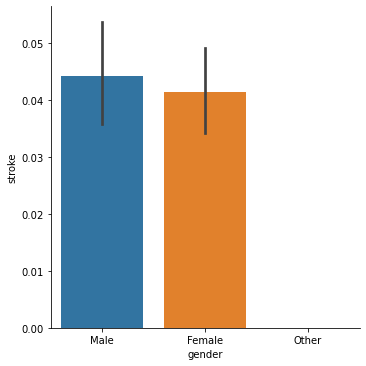

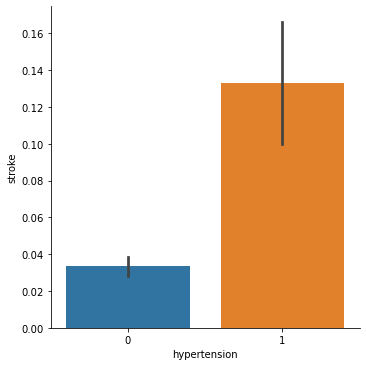

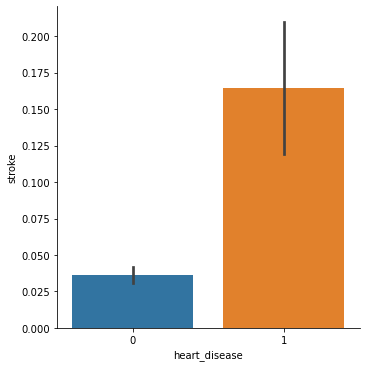

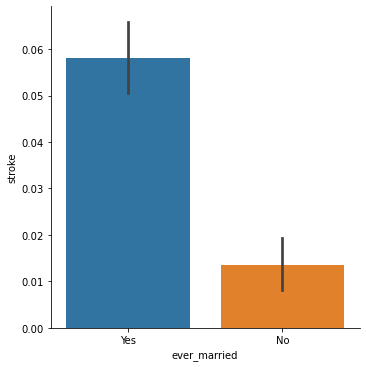

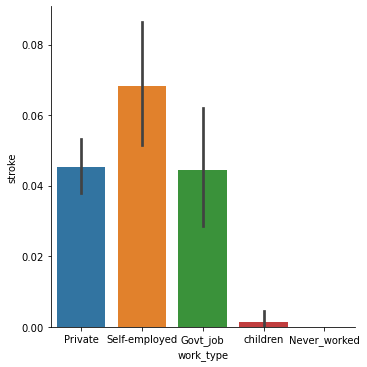

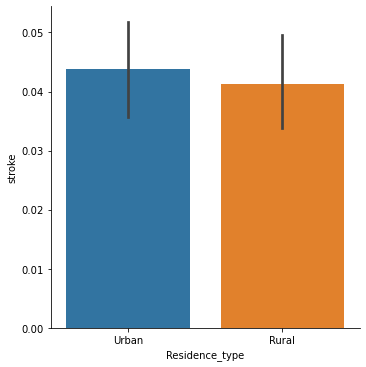

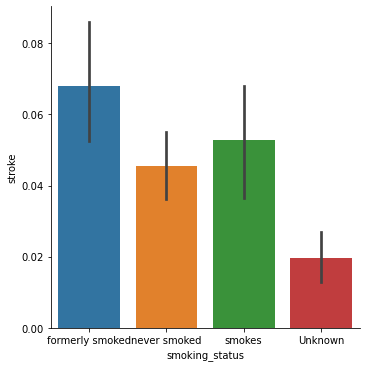

In [14]:
column_headers = list(data.columns.values)
del column_headers[12:]
column_headers.remove('id')
column_headers.remove('age')
column_headers.remove('avg_glucose_level')
column_headers.remove('bmi')
column_headers.remove('stroke')

for column in column_headers:
    sns.catplot(x=column , y='stroke', kind='bar', data=data)

In [15]:
def Group(column):
    
    df = pd.DataFrame()

    df["Stroke"] = data['stroke'].groupby(data[column]).sum()
    df["Total"] = data[column].groupby(data[column]).count()

    percents = []
    
    for i in df.index:
        stroke = int(df.loc[i,['Stroke']])
        total = int(df.loc[i,['Total']])
        percent = np.round((stroke/total)*100,2)
        percents.append(percent)
        
    df['Percent'] = percents
    df = df.sort_values('Percent', ascending=False)
    
    barchart = sns.catplot(x=df.index.tolist() , y='Percent', kind='bar', data=df)

    return df
    return barchart

,Stroke,Total,Percent
Weight Segment,,,
Overweight,173,3329,5.20
Normal Weight,35,1243,2.82
Underweight,1,337,0.30


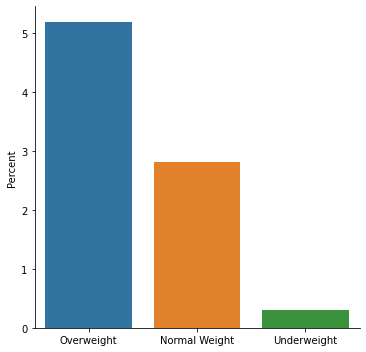

In [16]:
weight_status = []

for i in data['bmi'].tolist():
    if i>=25:
        weight_status.append('Overweight')
        
    elif 18.5<=i<25:
        weight_status.append('Normal Weight')
        
    elif 18.5>i:
        weight_status.append('Underweight')
        
data['Weight Segment'] = weight_status

Group('Weight Segment')

,Stroke,Total,Percent
Glucose Segment,,,
Diabetic,49,391,12.53
Pre-Diabetic,31,364,8.52
Normal,109,3414,3.19
Low,20,740,2.70


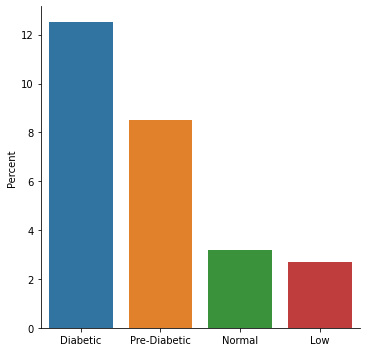

In [17]:
glucose_level = []

for i in data['avg_glucose_level'].tolist():
    if 200<i:
        glucose_level.append('Diabetic')
    
    elif 200>=i>140:
        glucose_level.append('Pre-Diabetic')
        
    elif 140>=i>70:
        glucose_level.append('Normal')
        
    elif i<=70:
        glucose_level.append('Low')
        
data['Glucose Segment']=glucose_level

Group('Glucose Segment')  

,Stroke,Total,Percent
Age Segment,,,
80+,39,182,21.43
70-80,71,513,13.84
60-70,40,590,6.78
50-60,41,805,5.09
40-50,12,705,1.70
30-40,5,631,0.79
10-20,1,485,0.21
0-10,0,459,0.00
20-30,0,539,0.00


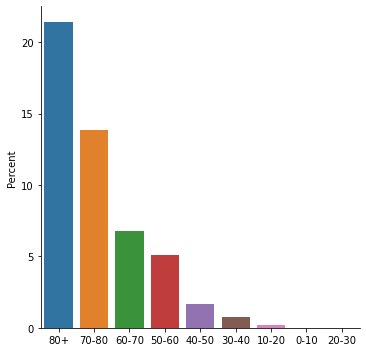

In [18]:
age = []

for i in data['age'].tolist():
    if 80<=i:
        age.append('80+')
    
    elif 80>i>=70:
        age.append('70-80')
        
    elif 70>i>=60:
        age.append('60-70')
        
    elif 60>i>=50:
        age.append('50-60')
    
    elif 50>i>=40:
        age.append('40-50')
        
    elif 40>i>=30:
        age.append('30-40')
        
    elif 30>i>=20:
        age.append('20-30')
        
    elif 20>i>=10:
        age.append('10-20')
        
    else:
        age.append('0-10')
        
data['Age Segment']=age

Group('Age Segment')

##### Variables with Hues

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


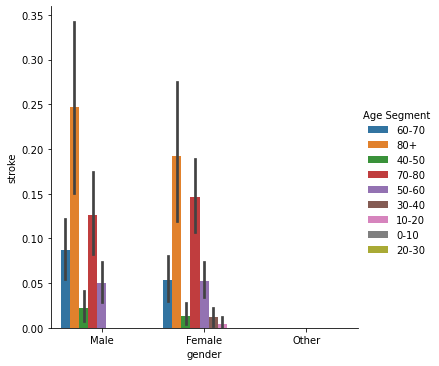

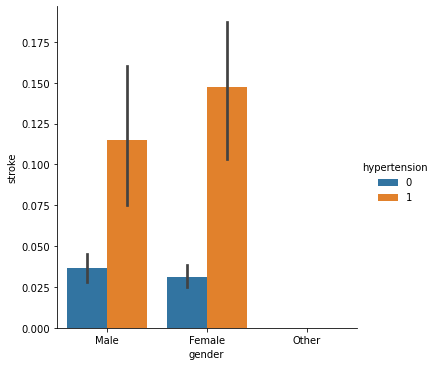

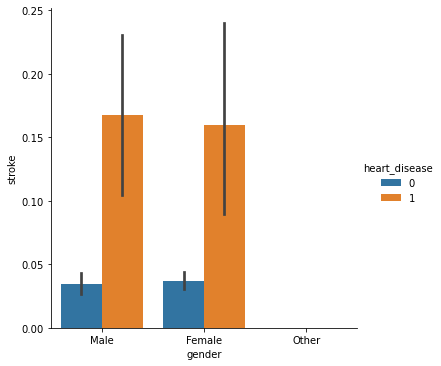

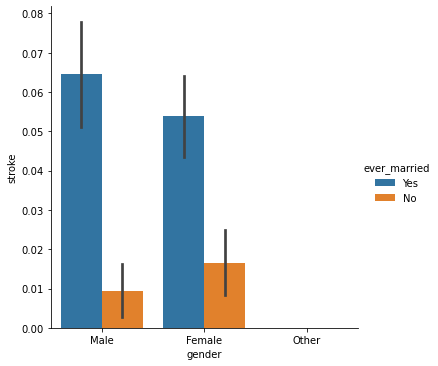

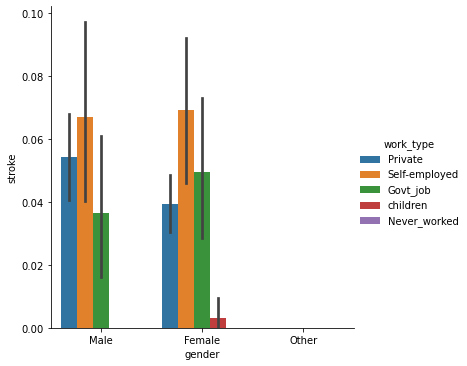

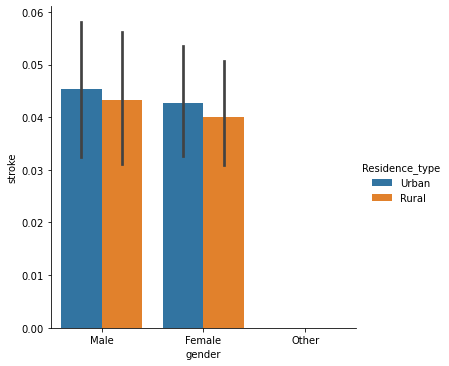

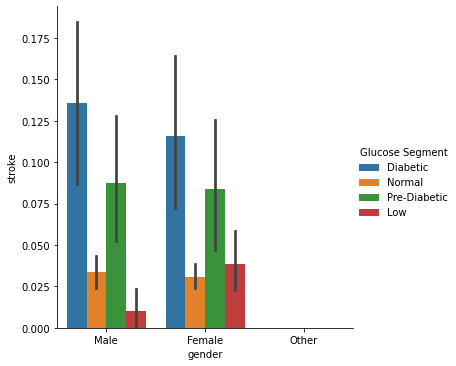

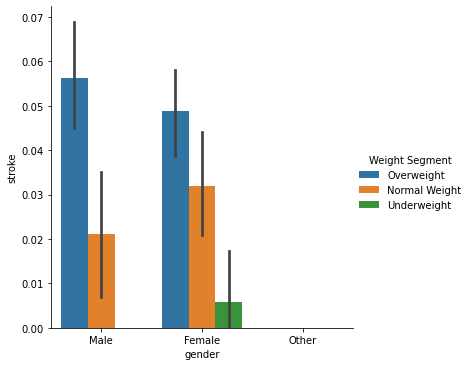

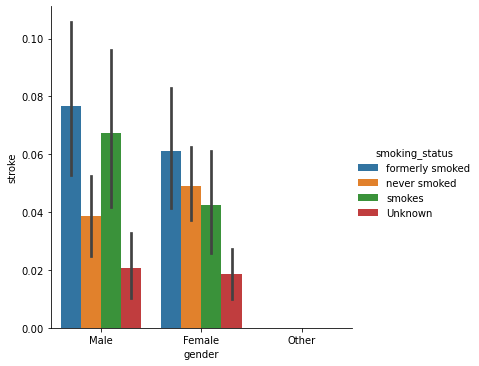

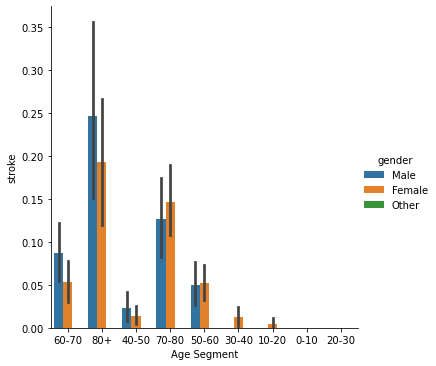

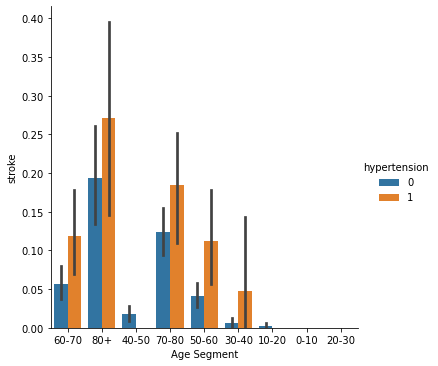

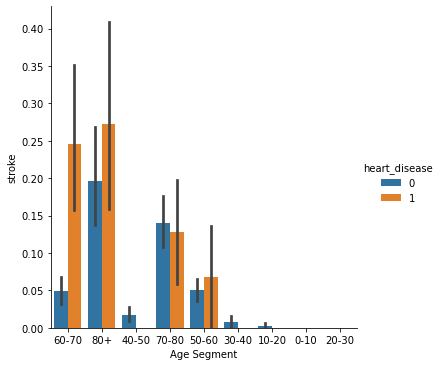

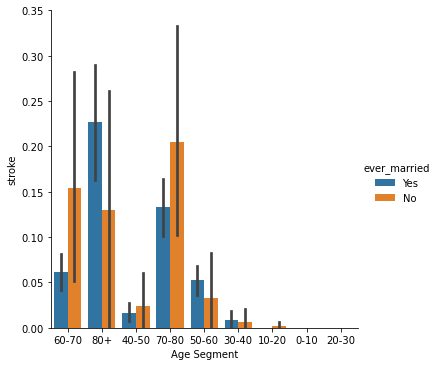

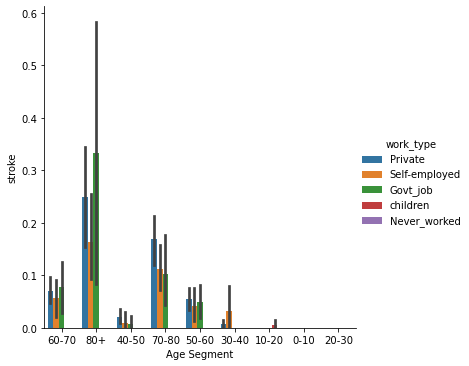

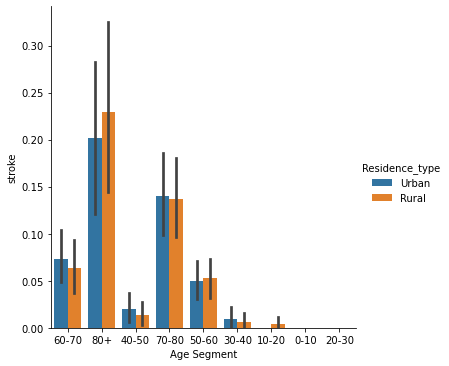

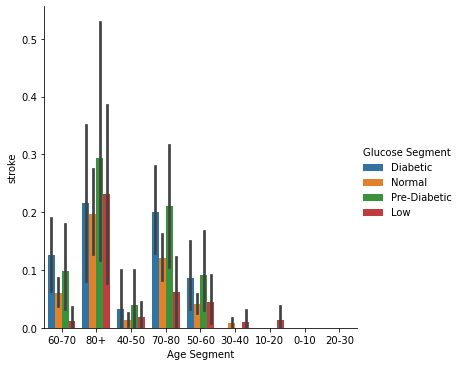

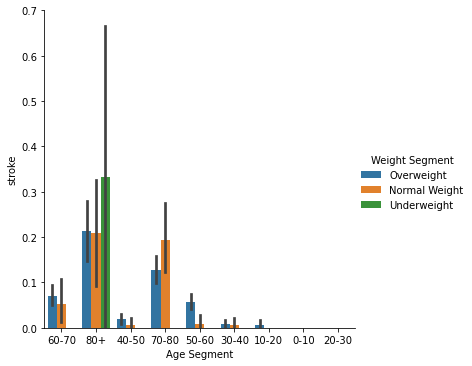

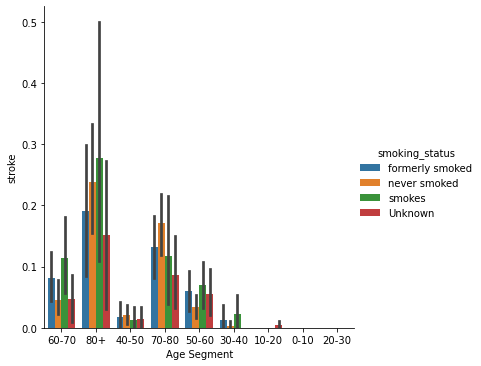

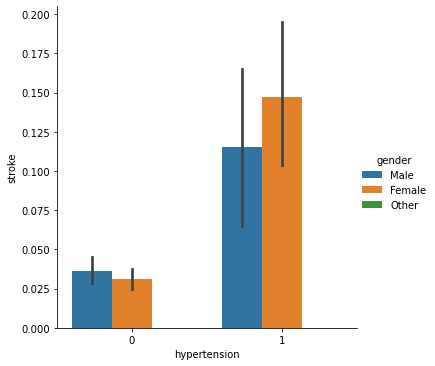

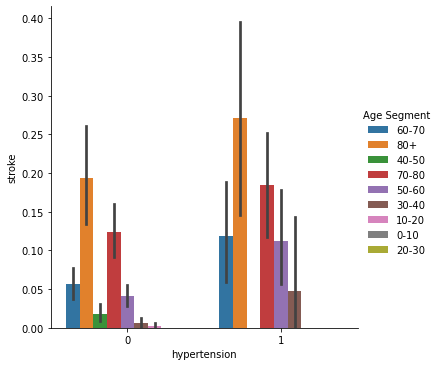

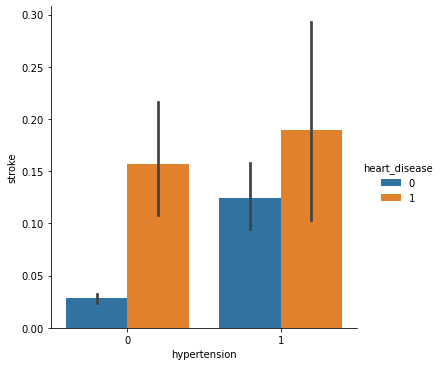

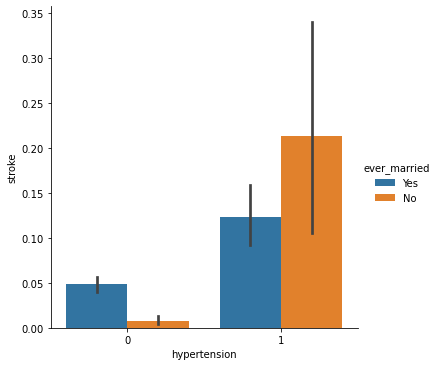

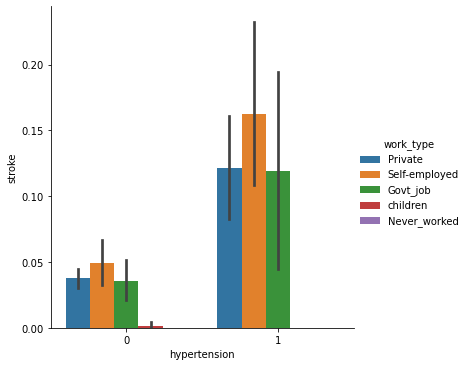

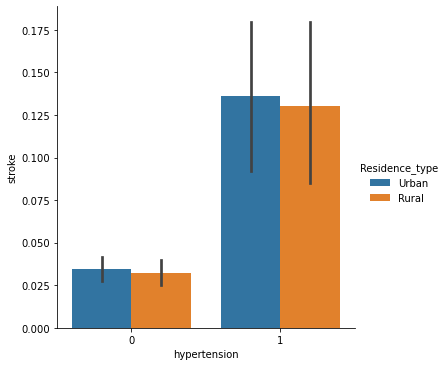

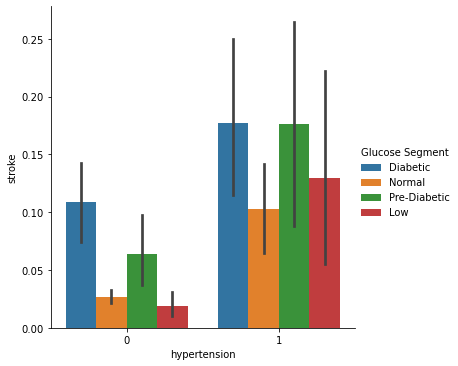

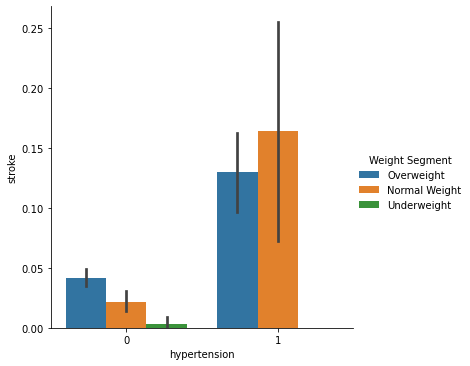

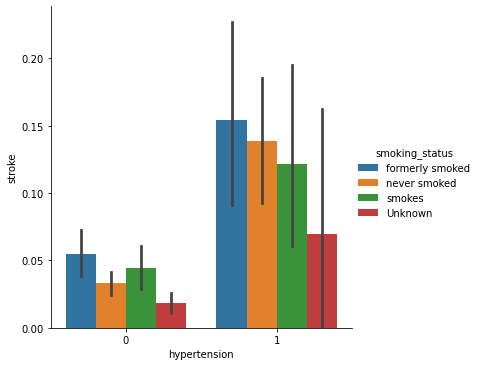

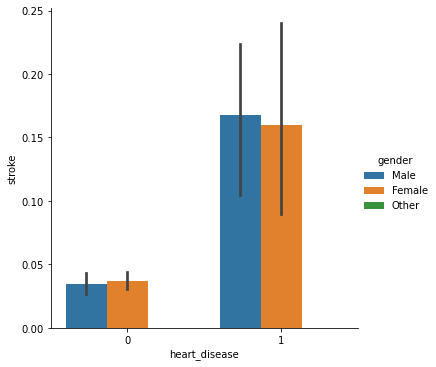

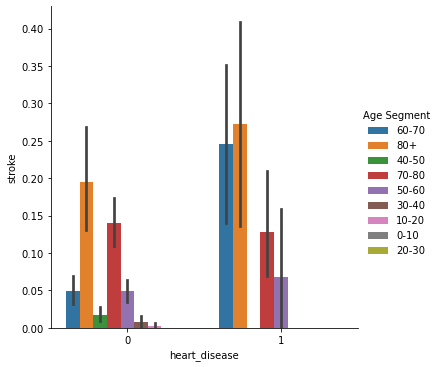

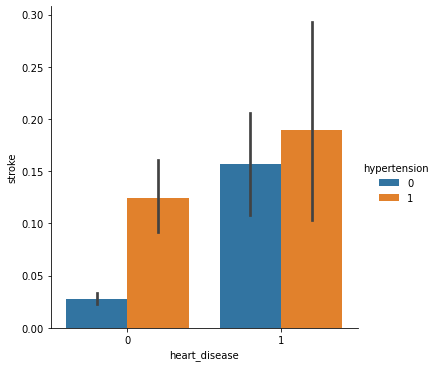

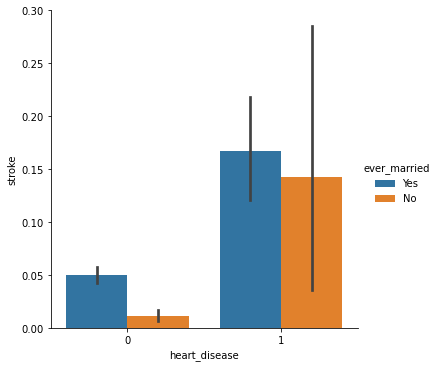

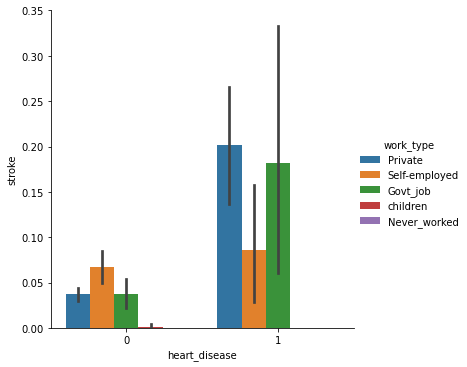

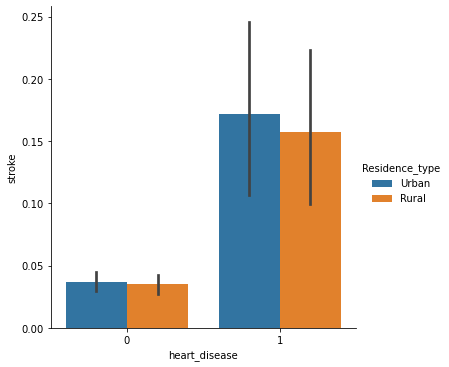

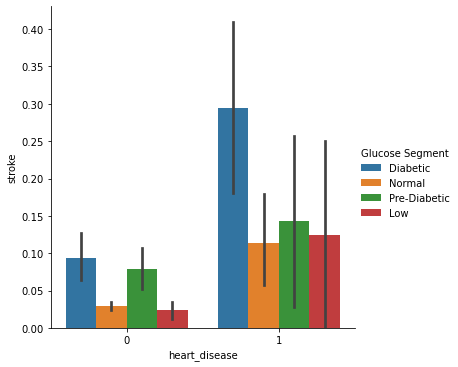

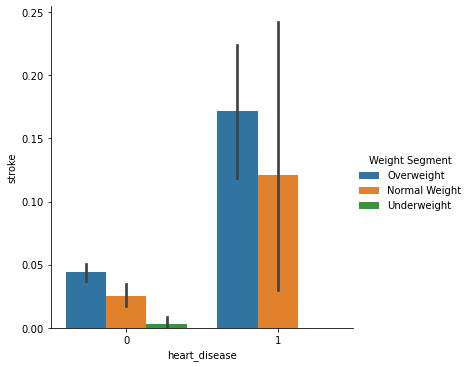

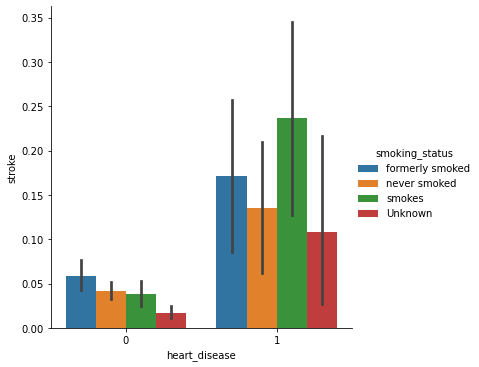

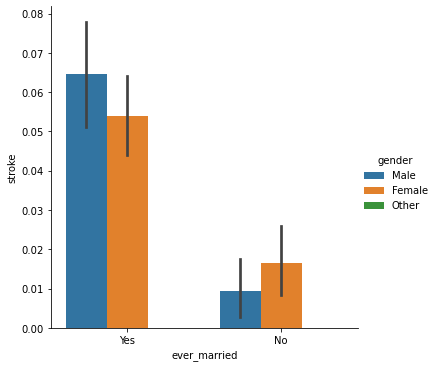

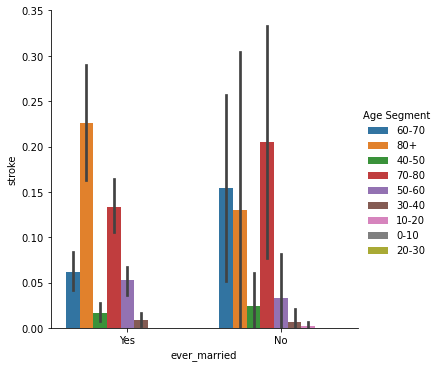

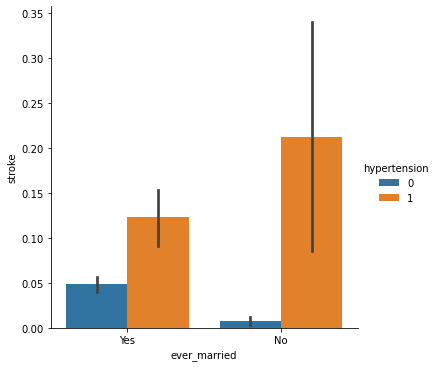

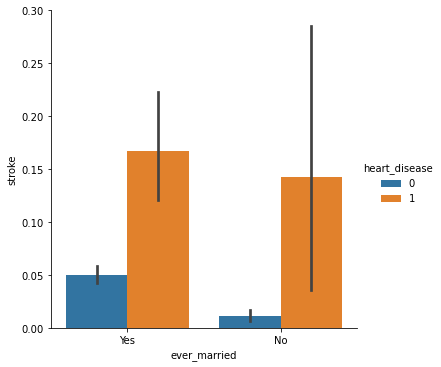

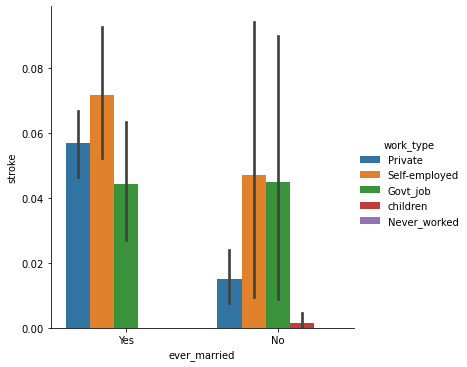

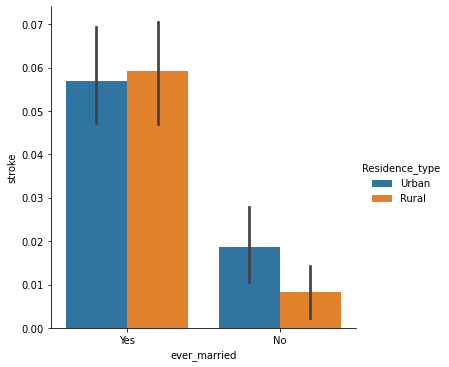

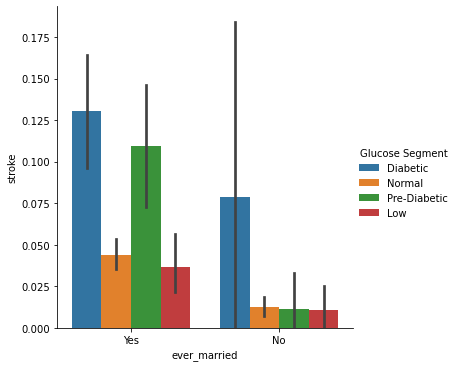

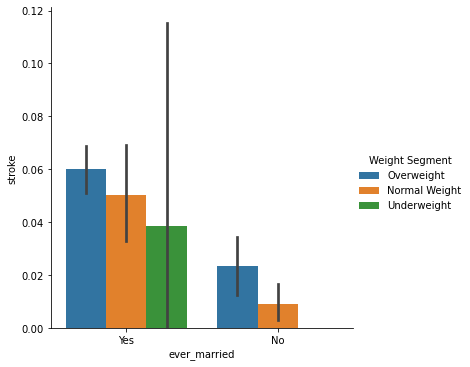

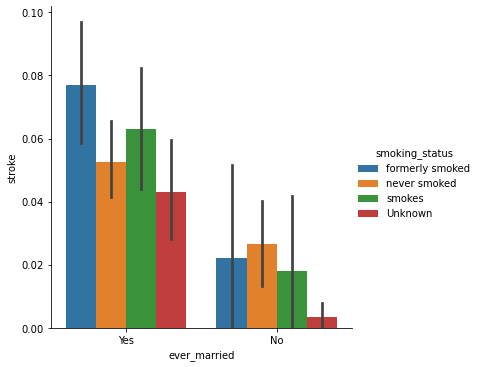

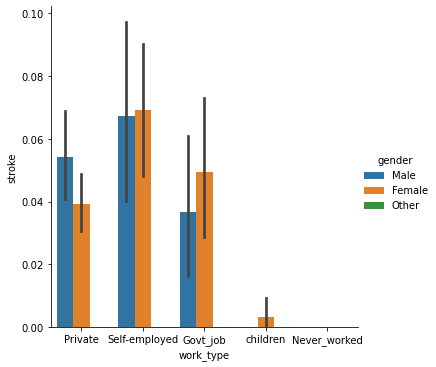

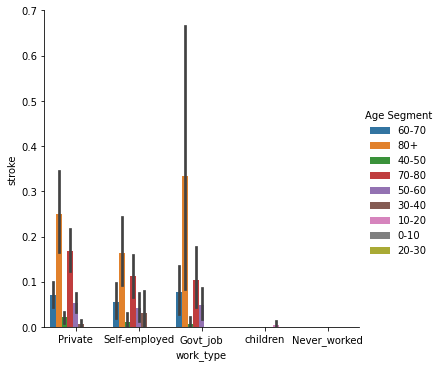

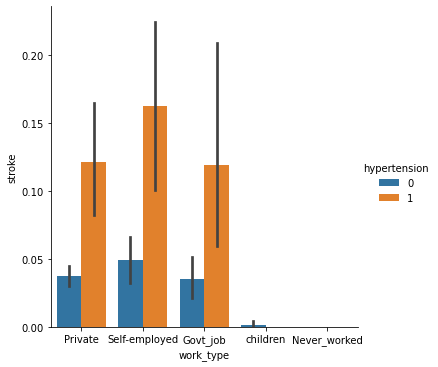

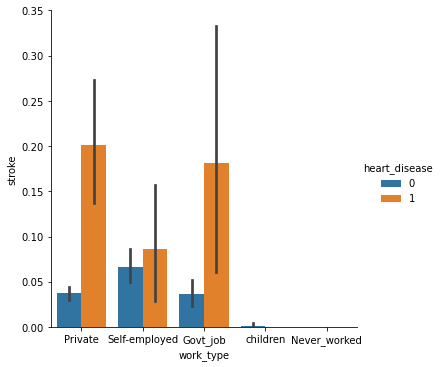

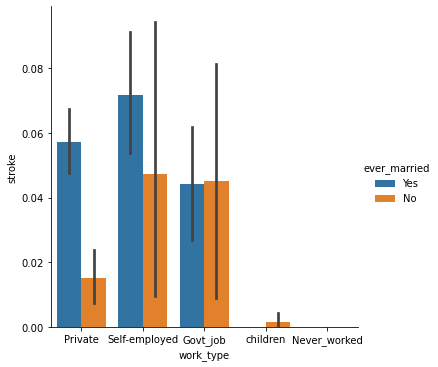

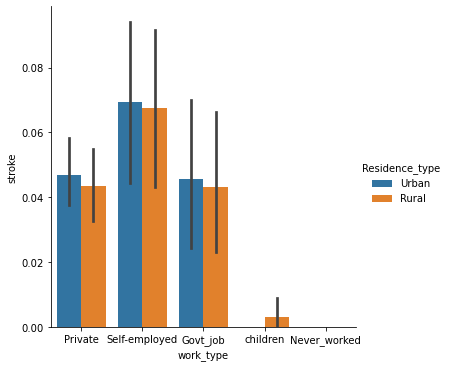

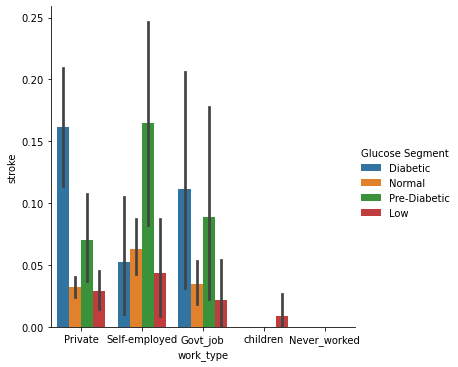

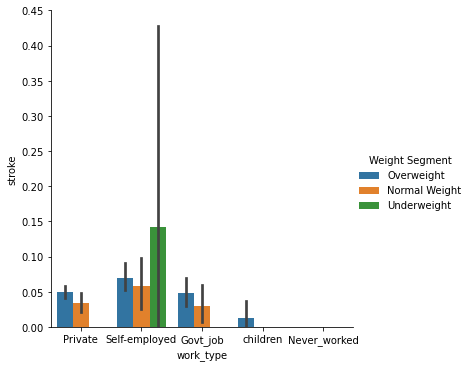

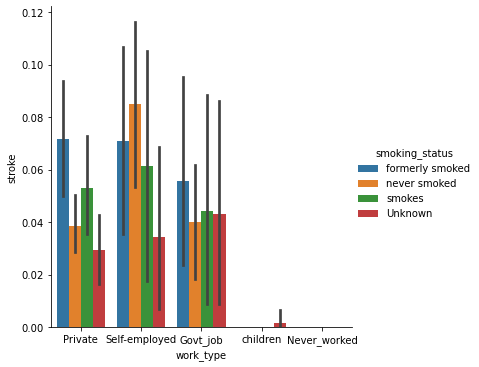

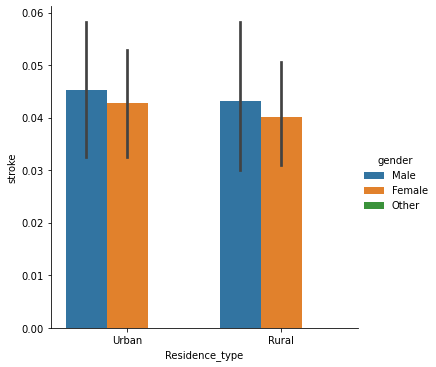

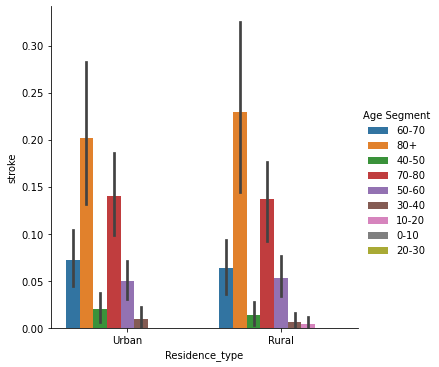

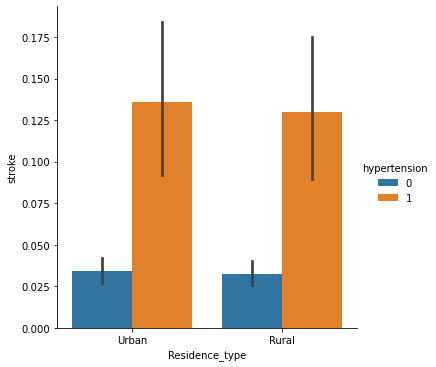

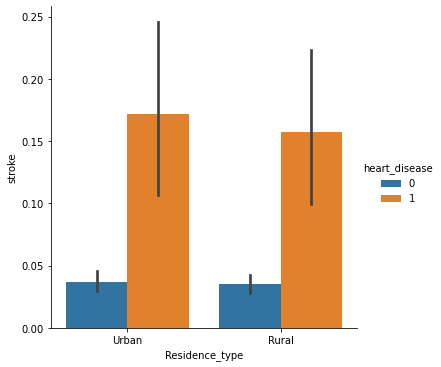

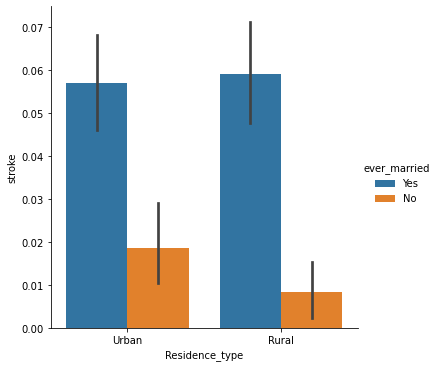

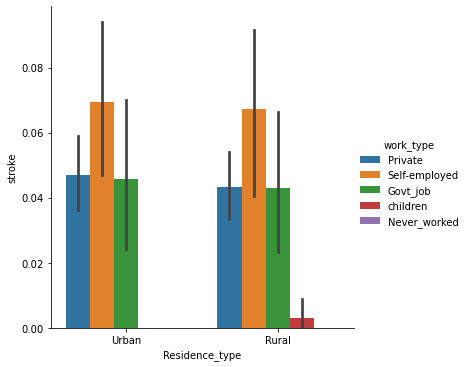

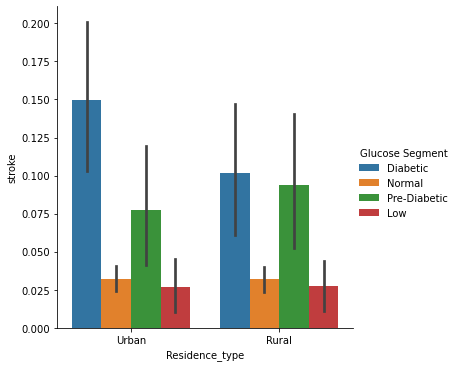

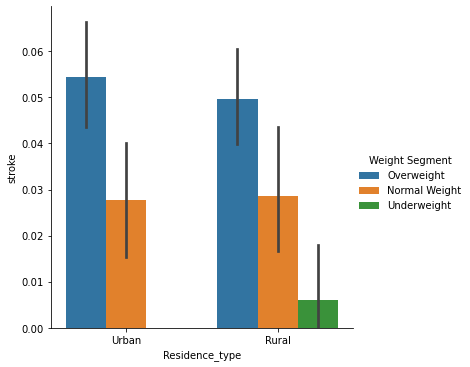

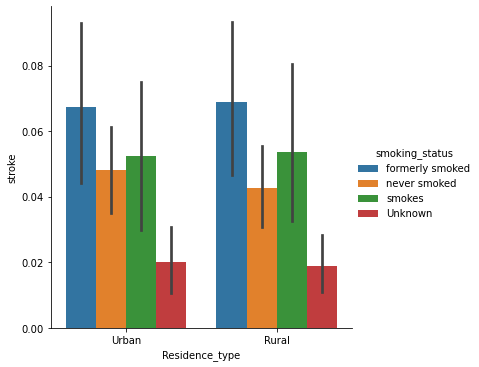

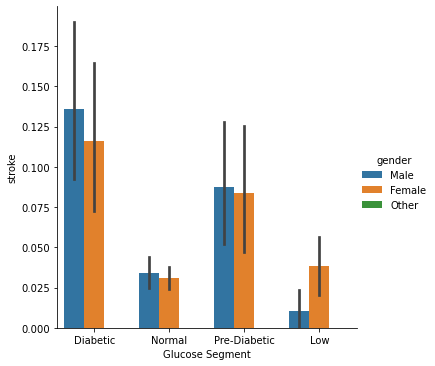

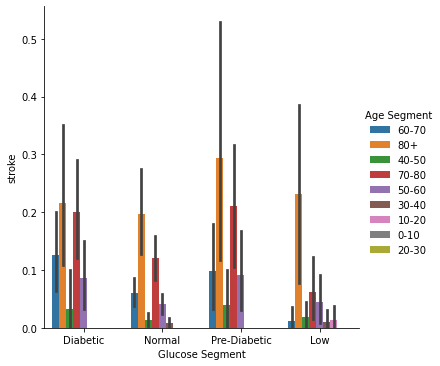

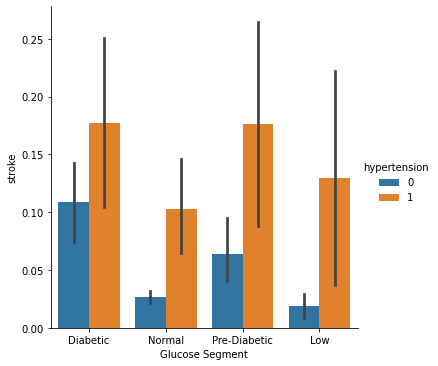

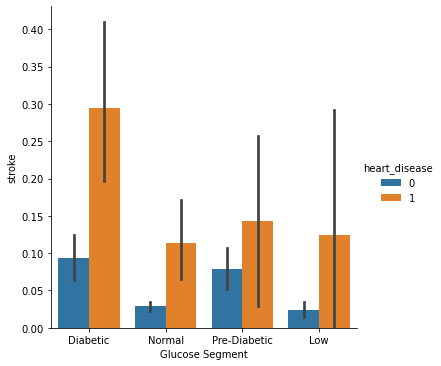

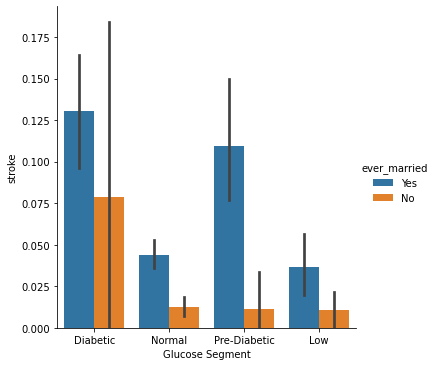

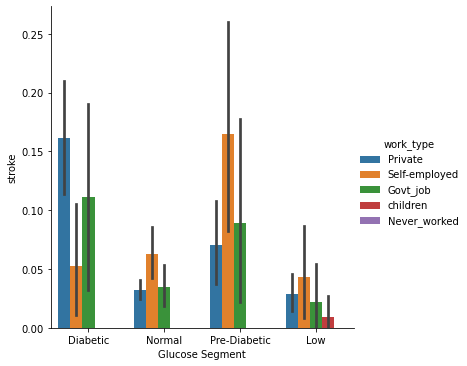

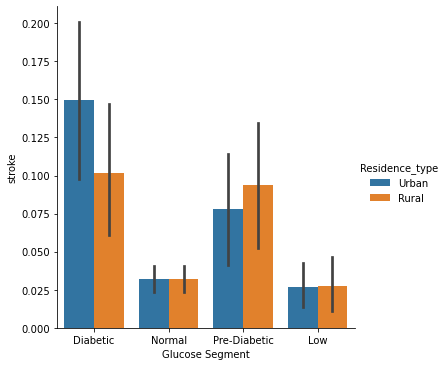

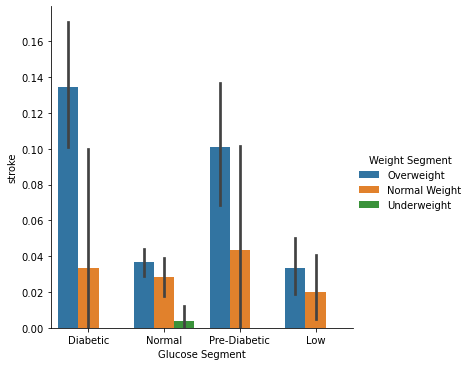

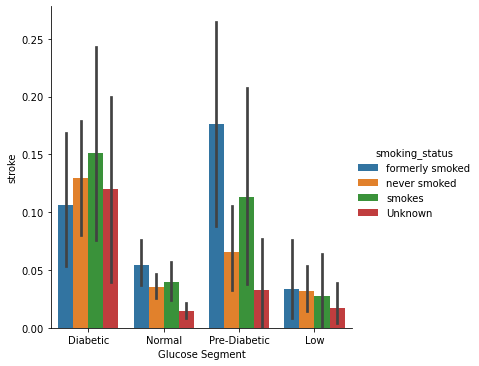

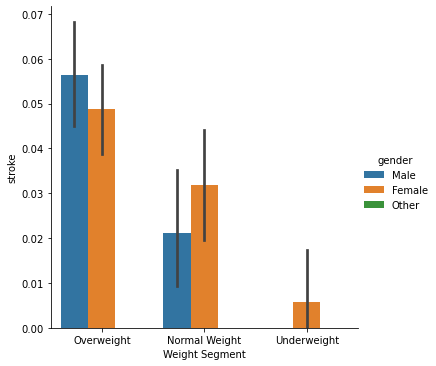

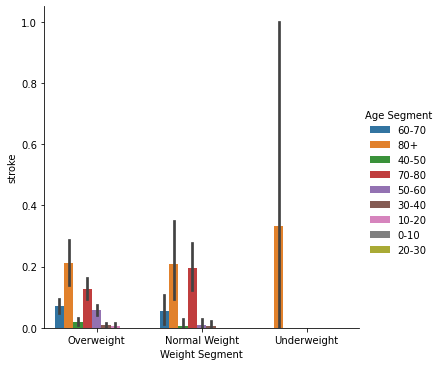

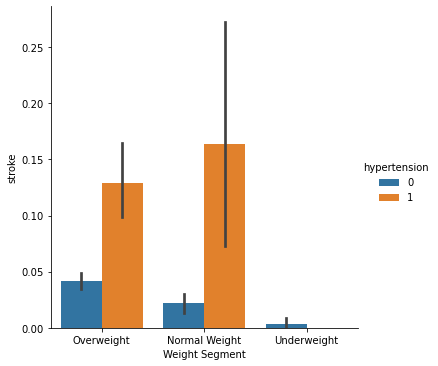

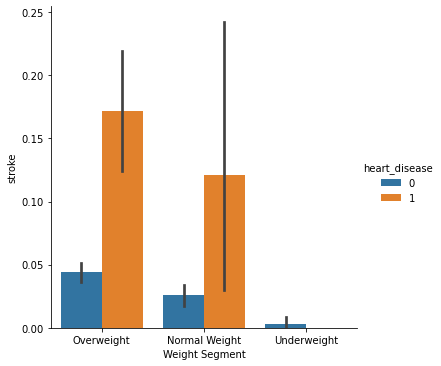

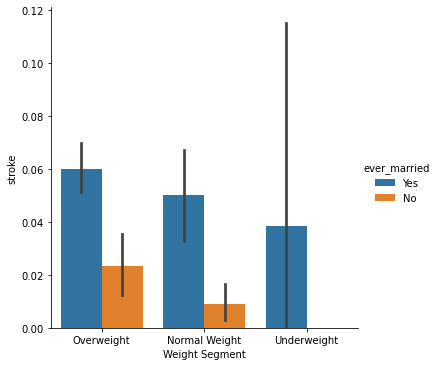

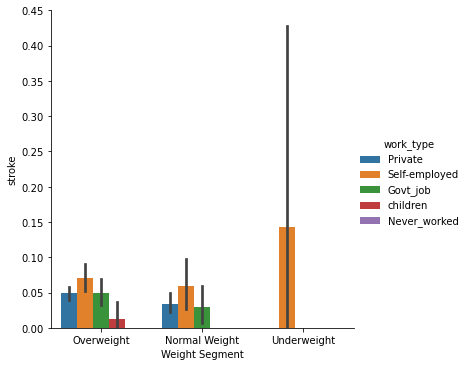

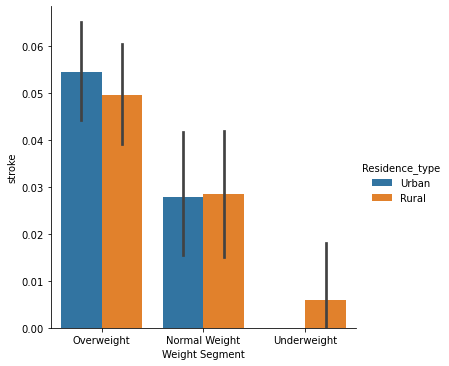

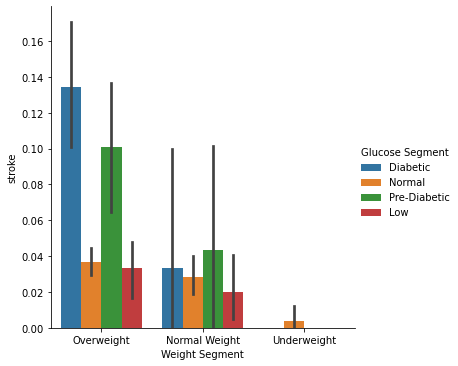

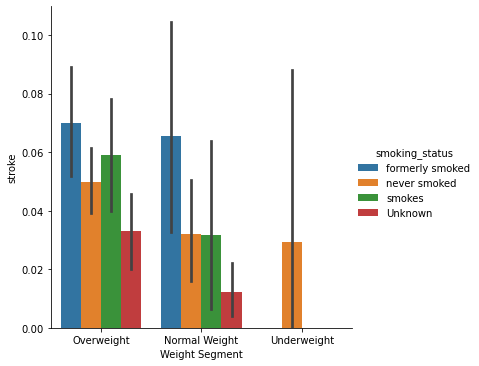

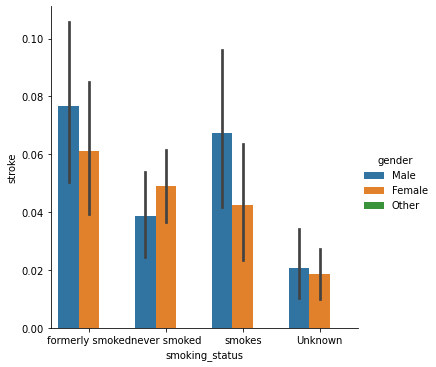

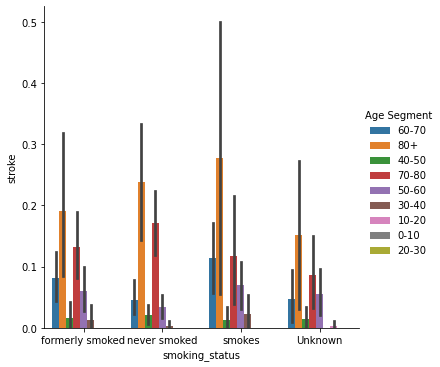

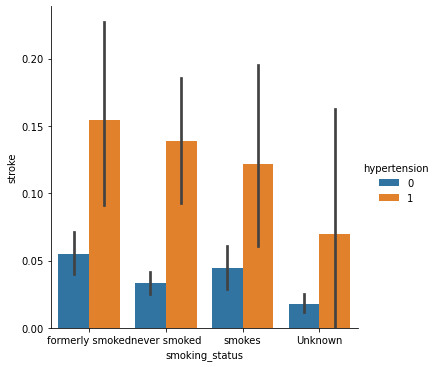

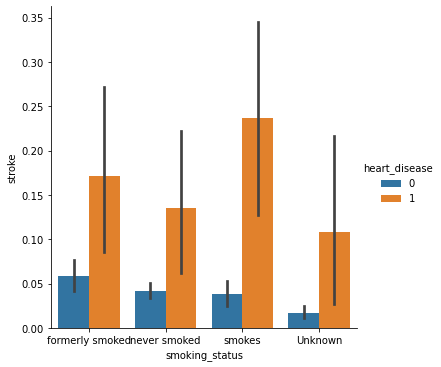

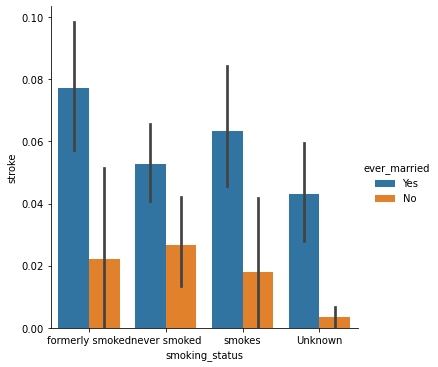

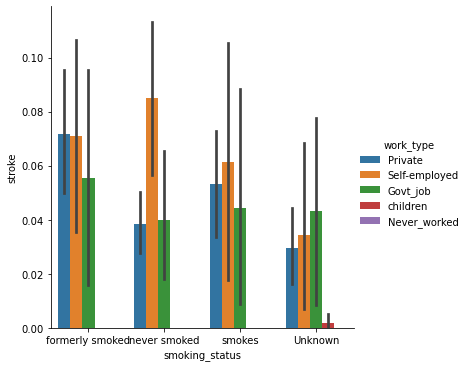

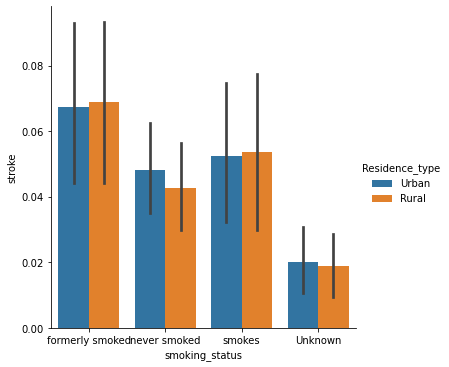

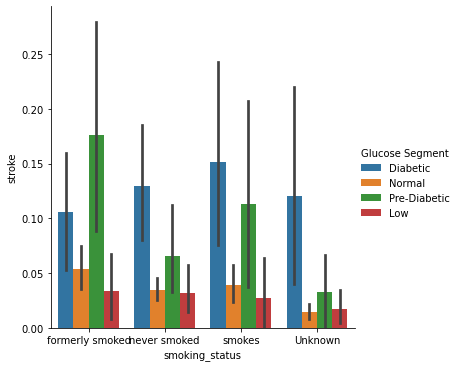

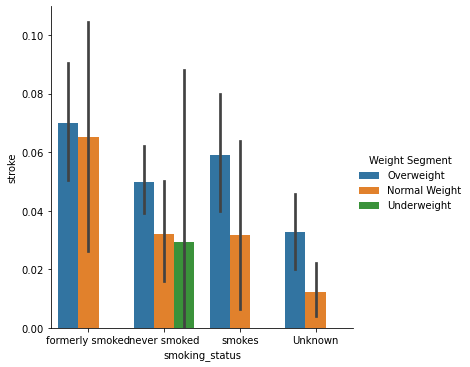

In [19]:
hues = data.columns.tolist()[1:11]
hues[1] = 'Age Segment'
hues[-3] = 'Glucose Segment'
hues[-2] = 'Weight Segment'

for i in hues:
    for j in hues:
        if i!=j:
            sns.catplot(x=i , y='stroke', hue=j, kind='bar', data=data)

In [20]:
# Assesing underweight and self-employed outlier
weight_work = data[['Weight Segment','work_type','stroke']]
weight_work.columns = ['weight_segment','work_type','stroke']
stroke = len(weight_work[(weight_work.weight_segment=='Underweight')&(weight_work.work_type=='Self-employed')&(weight_work.stroke==1)])
total = len(weight_work[(weight_work.weight_segment=='Underweight')&(weight_work.work_type=='Self-employed')])
print(stroke, "out of",total,"people who are underweight and self-employed experienced a stroke")

1 out of 7 people who are underweight and self-employed experienced a stroke


# Logistics Regression

##### Continuous Variable Transformations

In [21]:
def Log(column_header):
  
    var_list = data[column_header].tolist()
  
    log_var_list = []
  
    for i in var_list:
        log = np.log(i)
        log_var_list.append(log)

    new_log_column = "log_" + column_header

    data[new_log_column] = log_var_list

Log('age')
Log('bmi')
Log('avg_glucose_level')

In [22]:
def VarPredict(variables):
    
    y = data['stroke']
    x = data[variables]
  
    model = LogisticRegression(fit_intercept=True).fit(x,y)

    int = model.intercept_
    coefs = list(model.coef_)
    score = model.score(x,y)

    print("intercept:", int[0])
    print("score:", score)

    odds = []
    for coef in coefs:
      odd = math.e**(coef)
      odds.append(odd)

    df = pd.DataFrame(index = variables)
    df['Coefs'] = coefs[0]
    df['Odds'] = odds[0]
    return df.sort_values('Odds', ascending = False)

### Demographic

In [23]:
x = ['log_age','Male','log_bmi']
VarPredict(x)

intercept: -19.332774095693665
score: 0.9574251375025463


,Coefs,Odds
log_age,3.822544,45.720360
log_bmi,0.282796,1.326835
Male,0.076949,1.079987


### Medical Factors

In [24]:
x = ['hypertension','heart_disease','log_avg_glucose_level','smokes','formerly smoked','Unknown']
VarPredict(x)

intercept: -7.811189738248201
score: 0.9574251375025463


,Coefs,Odds
heart_disease,1.122302,3.071916
hypertension,1.020975,2.775899
log_avg_glucose_level,0.955789,2.600723
formerly smoked,0.285501,1.330429
smokes,0.128875,1.137548
Unknown,-0.596622,0.550669


### Non-Medical Factors

In [25]:
x = ['Yes','Govt_job','Private','Self-employed','children','Urban']
VarPredict(x)

intercept: -4.35839002113096
score: 0.9574251375025463


,Coefs,Odds
Yes,1.011444,2.749569
Self-employed,0.786669,2.196069
Private,0.469650,1.599434
Govt_job,0.360038,1.433385
Urban,0.052400,1.053797
children,-1.328423,0.264895
